In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# File paths
train_file = "TrainData.csv"
weather_file = "WeatherForecastInput.csv"
solution_file = "Solution.csv"
output_file = "ForecastTemplate2.csv"

In [3]:
# Loading the data
train_data = pd.read_csv(train_file, parse_dates=["TIMESTAMP"])
weather_data = pd.read_csv(weather_file, parse_dates=["TIMESTAMP"])
solution_data = pd.read_csv(solution_file, parse_dates=["TIMESTAMP"])

### Function to calculate wind direction

In [4]:
# Calculation of wind direction (degrees 0-360)
def wind_dir(U, V):
    return (270 - np.degrees(np.arctan2(V, U))) % 360

### Preparing the train and test data, train the model, make predictions and evaluate

In [5]:
# Preparing training data
train_data['WindDirection'] = wind_dir(train_data['U10'], train_data['V10'])
X_train = train_data[['WS10', 'WindDirection']]
y_train = train_data['POWER']

In [6]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# preparing the test data
weather_data['WindDirection'] = wind_dir(weather_data['U10'], weather_data['V10'])
X_test = weather_data[['WS10', 'WindDirection']]


In [8]:
# Predicting the output
predictions = model.predict(X_test)
predictions

array([ 0.35278186,  0.35906159,  0.3604764 ,  0.35531714,  0.36930461,
        0.37220174,  0.33568925,  0.22648548,  0.15838947,  0.03636161,
        0.00159319,  0.05069885,  0.07137814,  0.03547601, -0.0249989 ,
        0.04854513,  0.07236372,  0.09573544,  0.06736497, -0.02013567,
        0.01023778,  0.09085697,  0.12823159,  0.19366751,  0.42378969,
        0.4745107 ,  0.54175753,  0.61622029,  0.64523985,  0.60018125,
        0.53975664,  0.51458964,  0.51892841,  0.46821921,  0.41750394,
        0.33699424,  0.47226263,  0.57269761,  0.32638712,  0.37627475,
        0.48332154,  0.53751091,  0.47709282,  0.40148883,  0.4443809 ,
        0.5238346 ,  0.51585496,  0.50552962,  0.44861834,  0.45764789,
        0.59152863,  0.62441504,  0.60312219,  0.60201884,  0.59913388,
        0.59508835,  0.53084583,  0.46141661,  0.39646393,  0.5407979 ,
        0.55645199,  0.59600512,  0.65008363,  0.68915196,  0.71537294,
        0.73664461,  0.75200209,  0.77082587,  0.80620328,  0.87

In [9]:
# Calculating the RMSE
rmse = np.sqrt(mean_squared_error(solution_data['POWER'], predictions))
print("RMSE:", round(rmse, 4))

RMSE: 0.2149


In [10]:
# Evaluating the R² scores
print("Training set R² score:", round(model.score(X_train, y_train), 4))
print("Prediction set R² score:", round(model.score(X_test, solution_data['POWER']), 4))


Training set R² score: 0.529
Prediction set R² score: 0.4615


In [11]:
# Saving the forecast to a CSV file
forecast_df = pd.DataFrame({
    'TIMESTAMP': weather_data['TIMESTAMP'],
    'FORECAST': predictions
})
forecast_df.to_csv(output_file, index=False)
print(f"Saved forecast to {output_file}")


Saved forecast to ForecastTemplate2.csv


### Data Visualization

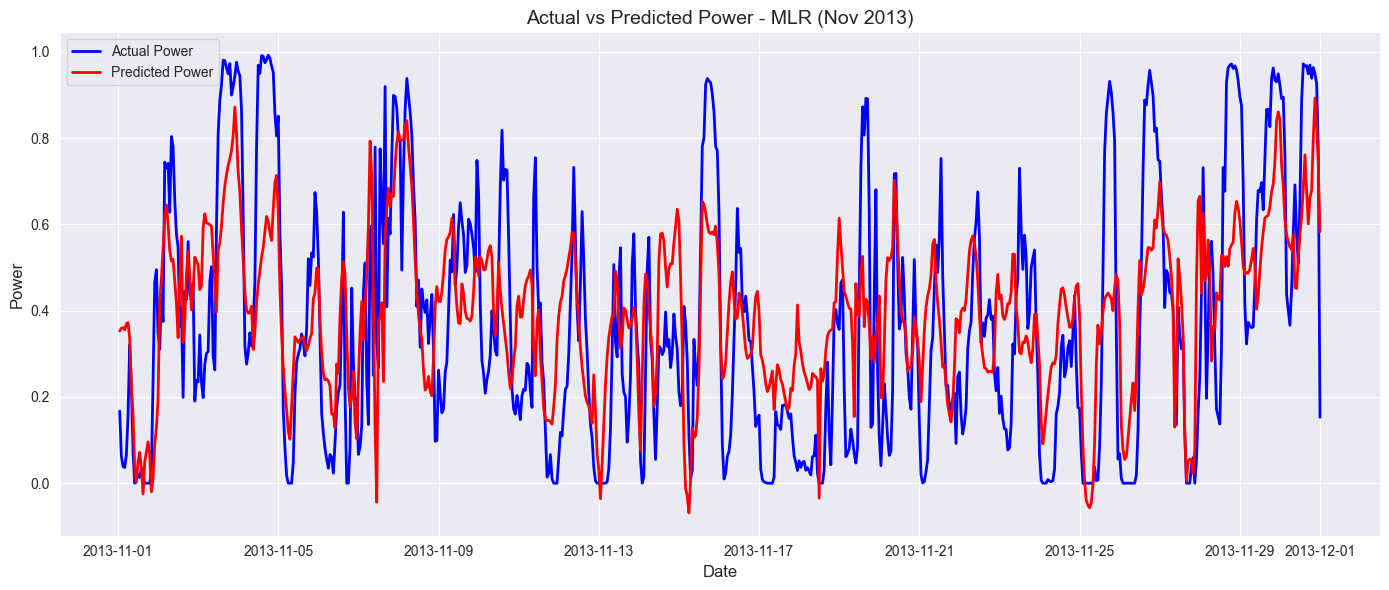

In [12]:
#Plotting Actual vs Predicted Power Multi.Linear Regression
solution = pd.read_csv("Solution.csv")
forecast = pd.read_csv("ForecastTemplate2.csv")

# converting timestamp to datetime
solution['TIMESTAMP'] = pd.to_datetime(solution['TIMESTAMP'])
forecast['TIMESTAMP'] = pd.to_datetime(forecast['TIMESTAMP'])

merged_df = pd.merge(solution, forecast, on='TIMESTAMP')

# Plot the actual vs predicted power
plt.figure(figsize=(14, 6))
plt.plot(merged_df['TIMESTAMP'], merged_df['POWER'], label='Actual Power', color='blue', linewidth=2)
plt.plot(merged_df['TIMESTAMP'], merged_df['FORECAST'], label='Predicted Power', color='red', linestyle='-', linewidth=2)

plt.title('Actual vs Predicted Power - MLR (Nov 2013)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

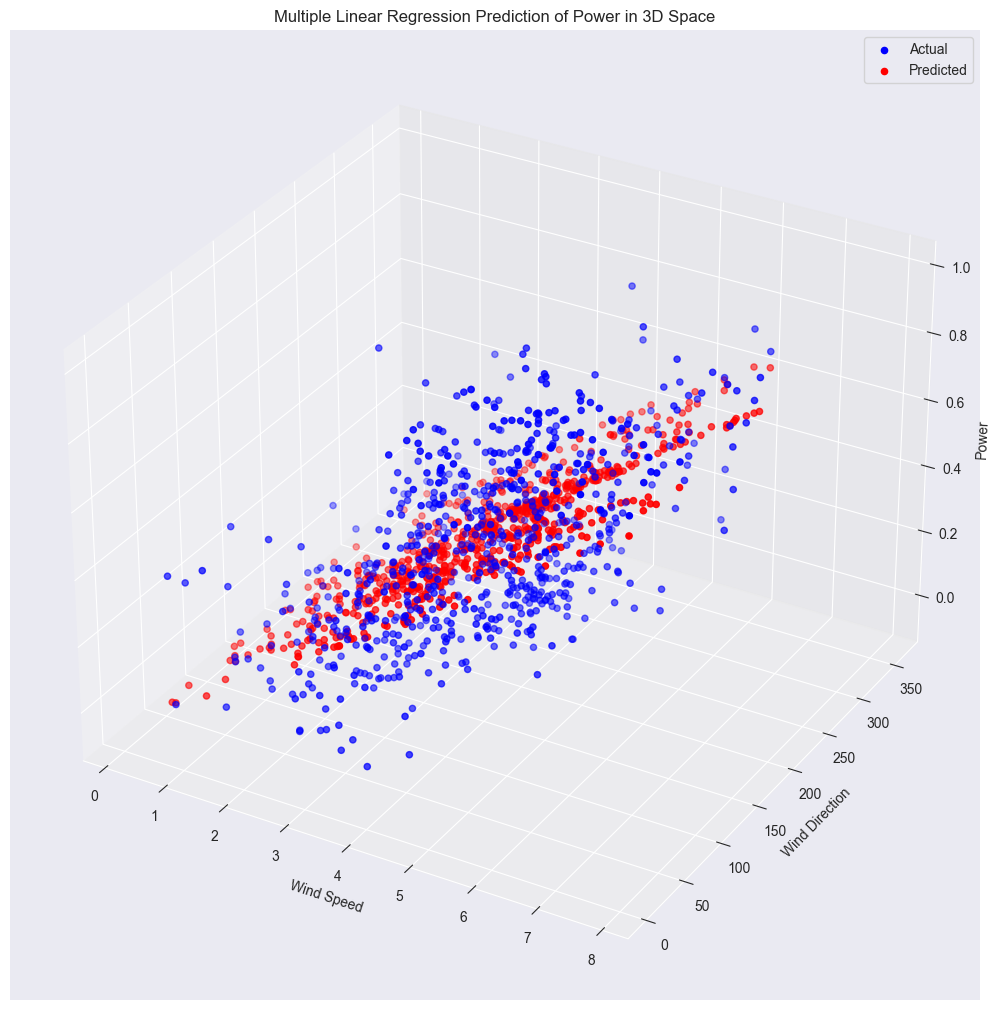

In [13]:
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['WS10'], X_test['WindDirection'], solution['POWER'], color='blue', label='Actual')
ax.scatter(X_test['WS10'], X_test['WindDirection'], predictions, color='red', label='Predicted')

ax.set_zlabel('Power')
ax.set_xlabel('Wind Speed')
ax.set_ylabel('Wind Direction')
ax.set_title('Multiple Linear Regression Prediction of Power in 3D Space')
ax.legend()
plt.tight_layout()
plt.show()


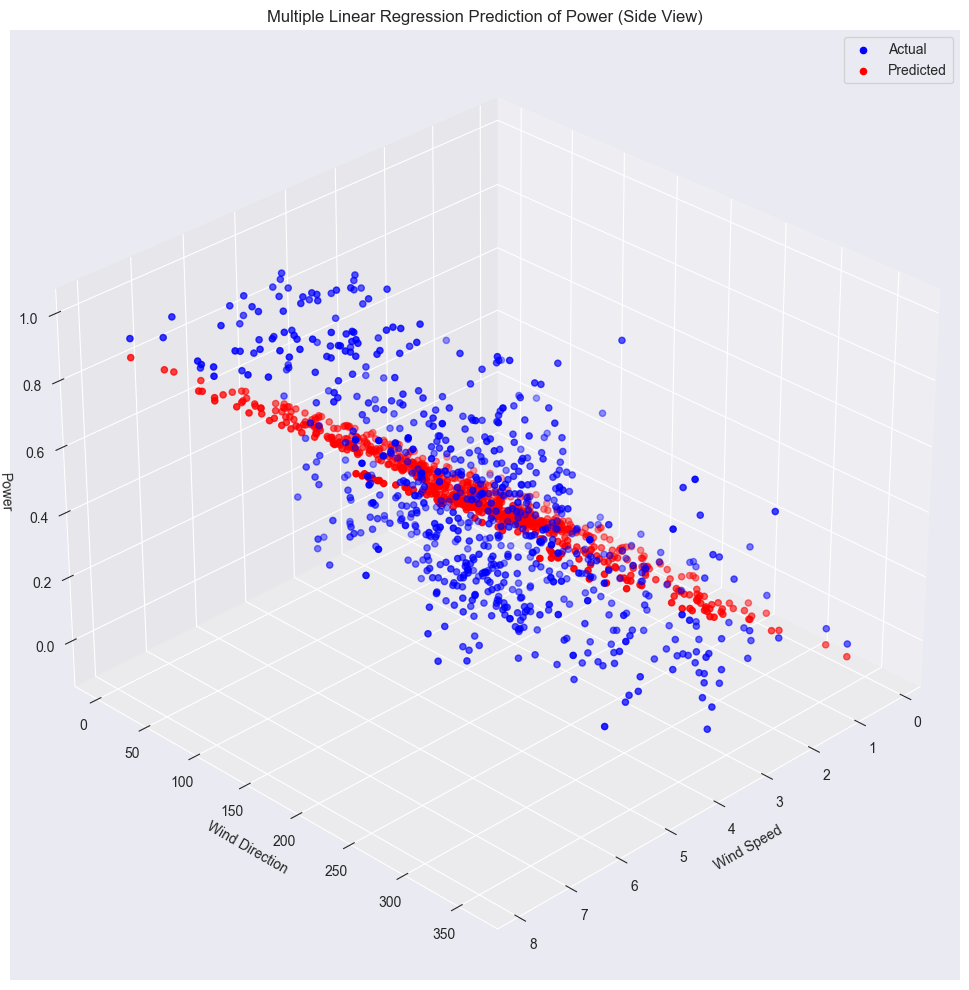

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['WS10'], X_test['WindDirection'], solution['POWER'], color='blue', label='Actual')
ax.scatter(X_test['WS10'], X_test['WindDirection'], predictions, color='red', label='Predicted')

ax.set_zlabel('Power')
ax.set_xlabel('Wind Speed')
ax.set_ylabel('Wind Direction')
ax.set_title('Multiple Linear Regression Prediction of Power (Side View)')

# Rotate the view
ax.view_init(elev=30, azim=45)

ax.legend()
plt.tight_layout()
plt.show()

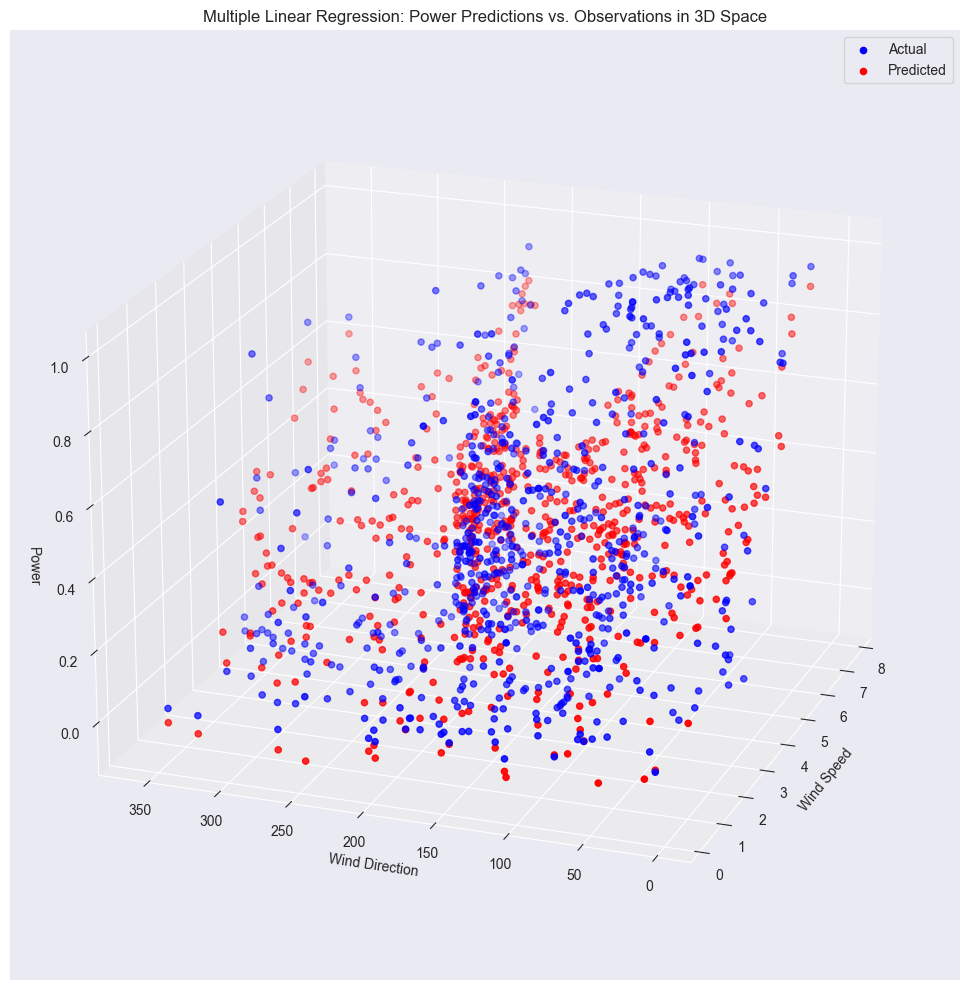

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['WS10'], X_test['WindDirection'], solution['POWER'], color='blue', label='Actual')
ax.scatter(X_test['WS10'], X_test['WindDirection'], predictions, color='red', label='Predicted')

ax.set_zlabel('Power')
ax.set_xlabel('Wind Speed')
ax.set_ylabel('Wind Direction')
ax.set_title('Multiple Linear Regression: Power Predictions vs. Observations in 3D Space')

# Rotate the view
ax.view_init(elev=20, azim=200)

ax.legend()
plt.tight_layout()
plt.show()

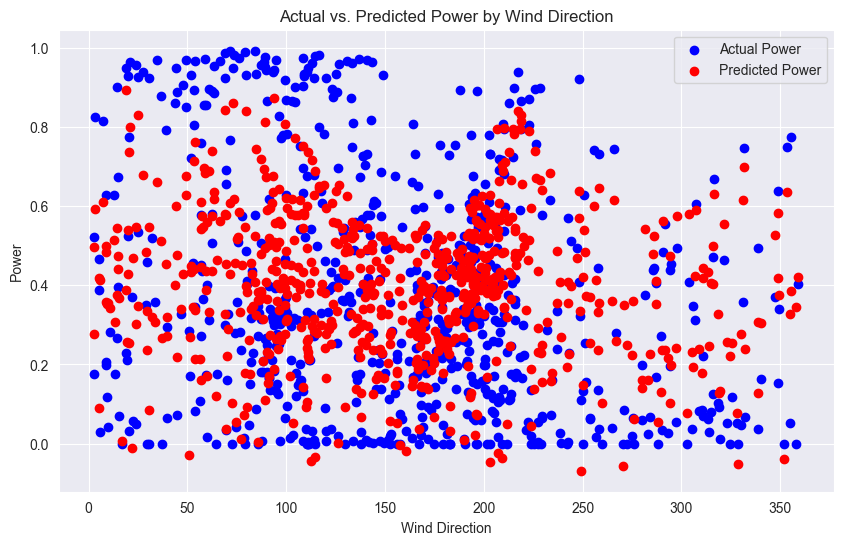

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['WindDirection'], solution['POWER'], color='blue', label='Actual Power')
plt.scatter(X_test['WindDirection'], predictions, color='red', label='Predicted Power')
plt.title('Actual vs. Predicted Power by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.show()

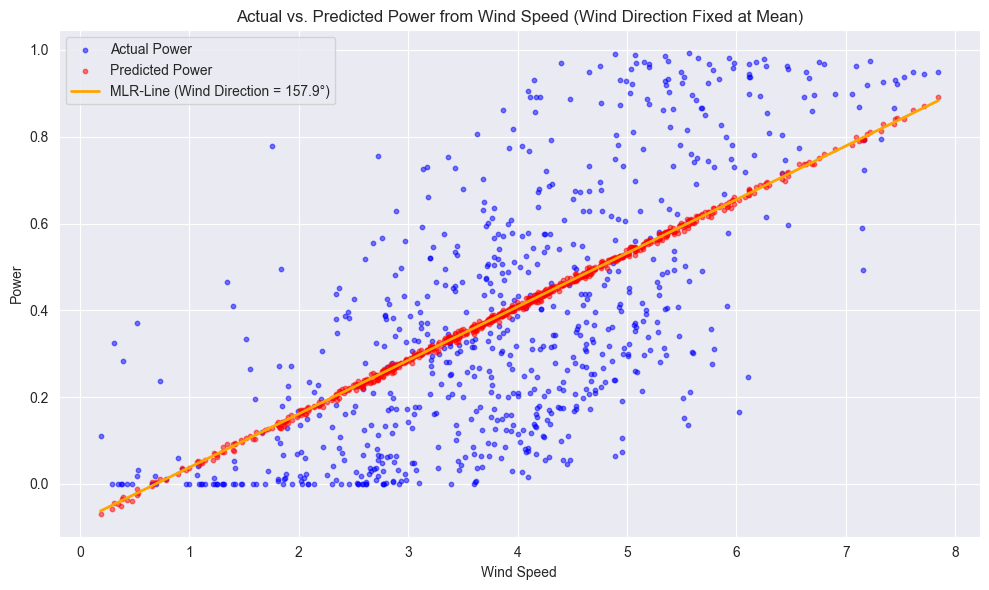

In [17]:
# Calculate the mean of wind direction
wd_mean = X_test['WindDirection'].mean()

# Retrieve test data for WS10 and POWER
ws_test = X_test['WS10']
y_test  = solution_data['POWER']

# Create a range of WS10 values for the line
ws_range = np.linspace(ws_test.min(), ws_test.max(), 200)

# Create DataFrame for model prediction along WS10 at constant WindDirection
line_df_ws = pd.DataFrame({
    'WS10': ws_range,
    'WindDirection': wd_mean
})

y_line_ws = model.predict(line_df_ws)

plt.figure(figsize=(10,6))
plt.scatter(ws_test, y_test,      alpha=0.5, label='Actual Power', color='blue', s=10)
plt.scatter(ws_test, predictions, alpha=0.5, label='Predicted Power', color='red', s=10)
plt.plot(ws_range, y_line_ws, color='orange', linewidth=2,
         label=f"MLR-Line (Wind Direction = {wd_mean:.1f}°)")
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.title('Actual vs. Predicted Power from Wind Speed (Wind Direction Fixed at Mean)')
plt.legend()
plt.tight_layout()
plt.show()

### Adding ForecastTemplate1-LR data from task 1 and merge with the current dataframe for analysis

In [18]:
# Reading the LR forecast data (task1), Rename FORECAST to FORECAST_LR, convert TIMESTAMP to datetime and merge with merged_df
lr_forcast = pd.read_csv("ForecastTemplate1-LR.csv")
lr_forcast.rename(columns={'FORECAST': 'FORECAST_LR'}, inplace=True)
lr_forcast['TIMESTAMP'] = pd.to_datetime(lr_forcast['TIMESTAMP'])
merged_df1 = pd.merge(merged_df, lr_forcast, on='TIMESTAMP')
merged_df1

,TIMESTAMP,POWER,FORECAST,FORECAST_LR
0,2013-11-01 01:00:00,0.167215,0.352782,0.360451
1,2013-11-01 02:00:00,0.063998,0.359062,0.365866
2,2013-11-01 03:00:00,0.039035,0.360476,0.366551
3,2013-11-01 04:00:00,0.036232,0.355317,0.360975
4,2013-11-01 05:00:00,0.064888,0.369305,0.374539
...,...,...,...,...
715,2013-11-30 20:00:00,0.963328,0.799496,0.785471
716,2013-11-30 21:00:00,0.948834,0.892652,0.877800
717,2013-11-30 22:00:00,0.925991,0.830364,0.816399
718,2013-11-30 23:00:00,0.773840,0.736020,0.722425


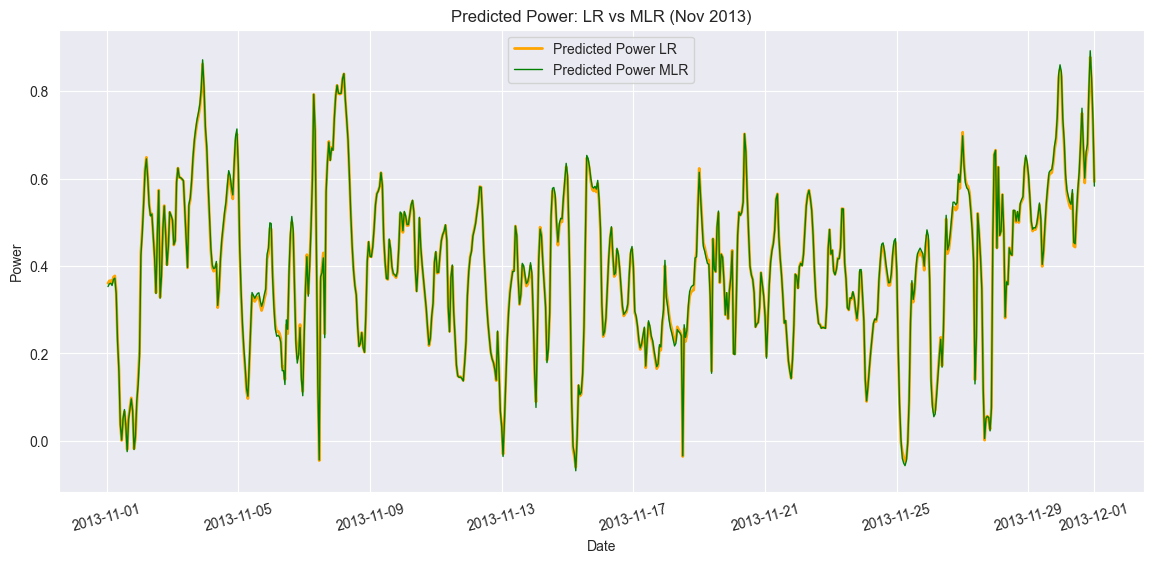

In [19]:
# Plot the FORECAST-LR and FORECAST-MLR from the new dataframe
plt.figure(figsize=(14, 6))
plt.plot(merged_df['TIMESTAMP'], merged_df1['FORECAST_LR'], label='Predicted Power LR', color='orange', linestyle='-', linewidth=2)
plt.plot(merged_df['TIMESTAMP'], merged_df1['FORECAST'], label='Predicted Power MLR', color='green', linestyle='-', linewidth=1)
plt.title('Predicted Power: LR vs MLR (Nov 2013)')
plt.xlabel('Date')
plt.ylabel('Power')
plt.legend()
plt.xticks(rotation=15)
plt.grid(True)
plt.show()

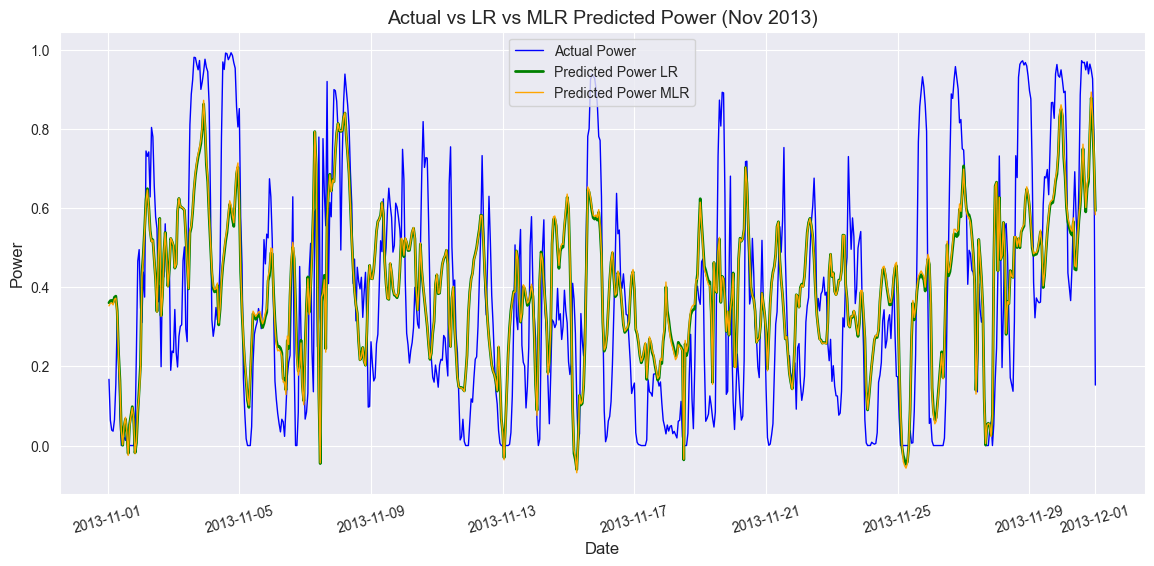

In [20]:
# Plot POWER, FORECAST LR and FORECAST MLR
plt.figure(figsize=(14, 6))
plt.plot(merged_df['TIMESTAMP'], merged_df1['POWER'], label='Actual Power', color='blue', linewidth=1)
plt.plot(merged_df['TIMESTAMP'], merged_df1['FORECAST_LR'], label='Predicted Power LR', color='green', linestyle='-', linewidth=2)
plt.plot(merged_df['TIMESTAMP'], merged_df1['FORECAST'], label='Predicted Power MLR', color='orange', linestyle='-', linewidth=1)
plt.title('Actual vs LR vs MLR Predicted Power (Nov 2013)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.xticks(rotation=15)
plt.legend()
plt.grid(True)
plt.show()

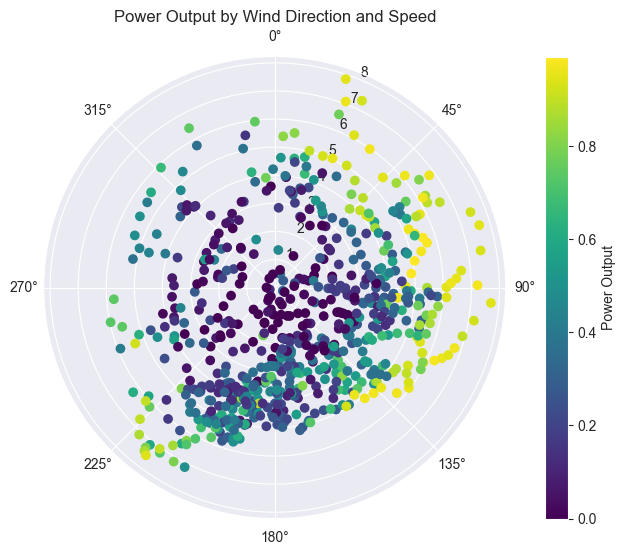

In [21]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, polar=True)
sc = ax.scatter(
    np.radians(X_test['WindDirection']),
    X_test['WS10'],
    c=solution['POWER'],
    cmap='viridis'
)
plt.colorbar(sc, label='Power Output')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Power Output by Wind Direction and Speed')
plt.show()

### Root Mean Square Error (RMSE) Comparison Table

In [22]:
rmse_lr  = np.sqrt(mean_squared_error(solution['POWER'], merged_df1['FORECAST_LR']))
rmse_mlr = np.sqrt(mean_squared_error(solution['POWER'], merged_df1['FORECAST']))

rmse_values = {
    'Model': ['Linear Regression', 'Multiple Linear Regression'],
    'RMSE': [rmse_lr, rmse_mlr]
}
rmse_df = pd.DataFrame(rmse_values).round(5)
rmse_df.set_index('Model', inplace=True)
rmse_df

,RMSE
Model,
Linear Regression,0.21638
Multiple Linear Regression,0.21494


### Correlation Table

In [23]:
# correlation coefficient with respect to POWER
corr_coeff = train_data[['POWER', 'WS10', 'WindDirection']].corr().loc['POWER']
corr_coeff = corr_coeff.round(4)
corr_coeff = corr_coeff.drop('POWER')
corr_coeff

WS10             0.7271
WindDirection    0.1702
Name: POWER, dtype: float64

### Correlation Coefficient Analysis

In [24]:
# Coefficient analysis
feature_names = ['WS10', 'WindDirection']
coeffs = pd.Series(model.coef_, index=feature_names)
print("Intercept:", model.intercept_)
print("Coefficients:")
print(coeffs)

Intercept: -0.07463178020846412
Coefficients:
WS10             0.123501
WindDirection   -0.000070
dtype: float64
